In [5]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTETomek

In [6]:
df = pd.read_csv('tel_churn.csv')
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


In [7]:
df = df.drop('Unnamed: 0', axis = 1)

In [8]:
#sperating X and Y variable from data

X = df.drop('Churn', axis = 1)
y = df['Churn']
X.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


In [9]:
y.shape


(7032,)

In [10]:
X.shape

(7032, 50)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [12]:
## Decision Tree Classifier

In [13]:
model_dt = DecisionTreeClassifier(criterion = 'gini', random_state = 80, max_depth = 6, min_samples_leaf = 8)

In [14]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=80, splitter='best')

In [15]:
y_pred = model_dt.predict(X_test)

In [51]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [16]:
print(classification_report(y_test, y_pred, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1022
           1       0.68      0.46      0.55       385

    accuracy                           0.79      1407
   macro avg       0.75      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [17]:
# as our minority class accuracy is very low so our model is not good and we know the reason that its due to the imbalanced data

In [21]:
#up sampling to resolve the imbalanced data issue
smk = SMOTETomek(random_state = 80)
X_res, y_res = smk.fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [22]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res,y_res, test_size = 0.2)

In [23]:
model_dt_smote = DecisionTreeClassifier(criterion = 'gini', random_state = 80, max_depth = 6, min_samples_leaf = 8)

In [24]:
model_dt_smote.fit(Xr_train, yr_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=80, splitter='best')

In [25]:
y_pred_smote = model_dt_smote.predict(Xr_test)

In [27]:
print(classification_report(yr_test, y_pred_smote, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       934
           1       0.82      0.86      0.84       972

    accuracy                           0.83      1906
   macro avg       0.83      0.83      0.83      1906
weighted avg       0.83      0.83      0.83      1906



In [28]:
#now we have much better model

In [30]:
print(confusion_matrix(yr_test, y_pred_smote))

[[747 187]
 [138 834]]


In [29]:
## Random forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
model_rf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf = 8)
model_rf.fit(X_train, y_train)
y_pred_rf = model_dt.predict(X_test)


In [39]:
print(classification_report(y_test, y_pred_rf, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1022
           1       0.68      0.46      0.55       385

    accuracy                           0.79      1407
   macro avg       0.75      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [44]:

sm = SMOTETomek()
X_res, y_res = sm.fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [45]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res,y_res, test_size = 0.2)

In [46]:
model_rf_smote = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 80, max_depth = 6, min_samples_leaf = 8)

In [47]:
model_rf_smote.fit(Xr_train, yr_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=80, verbose=0,
                       warm_start=False)

In [48]:
y_pred_rf_smote = model_rf_smote.predict(Xr_test)

In [49]:
print(classification_report(yr_test, y_pred_rf_smote, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       935
           1       0.85      0.87      0.86       974

    accuracy                           0.85      1909
   macro avg       0.85      0.85      0.85      1909
weighted avg       0.85      0.85      0.85      1909



In [50]:
print(confusion_matrix(yr_test, y_pred_rf_smote))

[[784 151]
 [127 847]]


In [52]:
print(recall_score(yr_test, y_pred_rf_smote))

0.8696098562628337


In [55]:
## Hyperparameter Tuning

In [58]:
#we will use RandomisedSearchCV as it is faster 
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [59]:
#no. of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num =12)] #linspace gives us equally spaced numbers based on intervals

#no. of features to consider every split
max_features = ['auto', 'sqrt']

#max no. of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

#min no. of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

#min no.of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [60]:
#create random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [61]:
# random search using 5 fold cv 
rf_random = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error',
                               n_iter =10, cv = 5, verbose = 2, random_state = 42, n_jobs = 1)

In [62]:
rf_random.fit(Xr_train,yr_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   8.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=6,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=8,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                  

In [63]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [64]:
prediction = rf_random.predict(Xr_test)

In [65]:
print(classification_report(yr_test, prediction, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       935
           1       0.90      0.84      0.87       974

    accuracy                           0.87      1909
   macro avg       0.88      0.87      0.87      1909
weighted avg       0.88      0.87      0.87      1909



In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


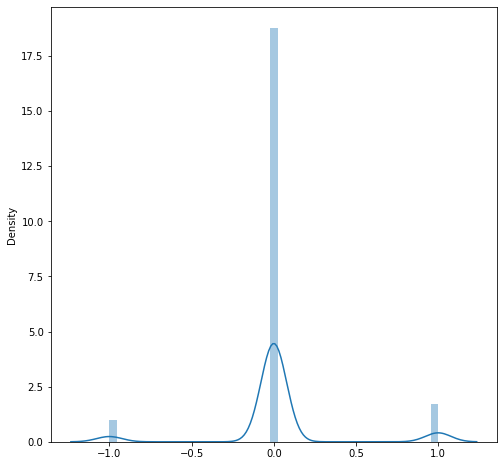

In [70]:
plt.figure(figsize = (8,8))   
sns.distplot(yr_test-prediction)
plt.show()

In [73]:
## Saving our model

In [74]:
import pickle

In [75]:
filename = 'churn_model.sav'

In [76]:
pickle.dump(rf_random, open(filename, 'wb'))

In [81]:
load_model = pickle.load(open(filename, 'rb')) # to load again